# WorkShop #2

Dataset source: [Kaggle](https://www.kaggle.com/)

*   [housing prices](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

## Regresión Lineal, Ridge y Lasso

In [43]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso #RidgeCV (validación cruzada)
from sklearn.preprocessing import StandardScaler

### Lectura de Datos

In [18]:
# Loading the Dataset
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/kathy/Desktop/ml/week2/practicelinealmodel/Housing.csv", sep=',') #Lectura de data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


A continuación, presentamos la descripción general del conjunto de datos `Housing Prices Dataset`. 

In [19]:
df_price = df.copy()
print("Tipo de datos:")
df_price.info()

Tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Modelo de Regresión Lineal 

* Preparación de datos: Dado que nuestro conjunto de datos incluye variables predictoras o explicativas categóricas con múltiples niveles, necesitamos realizar una transformación en nuestros datos originales utilizando el siguiente código. Esto es necesario ya que vamos a emplear la librería `sklearn`.
* Las variables objetivo es el precio de cada vivienda (`price`).  

In [20]:
#Crea una columna por cada nivel de nuestras variables predictoras de tipo categórico. 
datos_rl = df_price.copy()
datos_rl = pd.get_dummies(datos_rl,dtype=int)
datos_rl.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [21]:
print("Tipo de datos:")
datos_rl.info() 

Tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    int32
 7   mainroad_yes                     545 non-null    int32
 8   guestroom_no                     545 non-null    int32
 9   guestroom_yes                    545 non-null    int32
 10  basement_no                      545 non-null    int32
 11  basement_yes                     545 non-null    int32
 12  hotwaterheating_no               54

A continuación se configuran los parámetros de nuestro modelo de regresión lineal: 

In [23]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Create linear regression object
modelrl = linear_model.LinearRegression()

#Definición de variables
datosmod1 = datos_rl.copy()# Data cleaning: eliminar columnas no útiles
y = datosmod1['price'] # Extraer la variable dependiente (variable objetivo)
x = datosmod1.drop(columns=['price'])# Eliminar la columnas del DataFrame antes de aplicar One-Hot Encoding

#División de la data 
hprice_X_train, hprice_X_test, hprice_y_train, hprice_y_test = train_test_split(x, y, random_state=42, test_size=0.30)# Dividir los datos en conjuntos de entrenamiento y prueba


A continuación se ajusta el modelo de regresión lineal a los datos de entrenamiento y se estiman el intercepto ($\beta_0$) y los coeficinetes ($\beta_i $).

In [24]:
mod1 = modelrl.fit(hprice_X_train, hprice_y_train) # Ajustar el modelo a los datos de entrenamiento

# Crear lista  
column_labels = hprice_X_train.columns.tolist() #Creo una lista con el nombre de las columnas
column_labels.append('Intercepto') #Adiciono a la lista la etiqueta intercepto. 

coef = mod1.coef_.squeeze().tolist() #Se extraen los coeficientes del modelo en formato lista

coef.append(mod1.intercept_) #Se adiciona a la lista de coficientes del modelo el valor del intercepto que arroja el modelo. 

coef_model = pd.DataFrame([coef], columns=column_labels) #por ultimo convertimos la lista en un datafram indicando que la cabecera tome el nombre de column-labels
coef_model.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Intercepto
0,253.287252,80893.141271,1.114751e+06,417267.580108,303111.236336,-204036.840953,204036.840953,-137855.266526,137855.266526,-241301.760941,...,-308187.711359,308187.711359,-342919.6728,342919.6728,-254596.044407,254596.044407,170947.967928,49295.304928,-220243.272857,1.413734e+06


In [25]:
# Make predictions using the testing set
hprice_y_pred = modelrl.predict(hprice_X_test)

print("Mean squared error: %.2f" % mean_squared_error(hprice_y_test, hprice_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(hprice_y_test, hprice_y_pred))

Mean squared error: 1523019469501.29
Coefficient of determination: 0.65


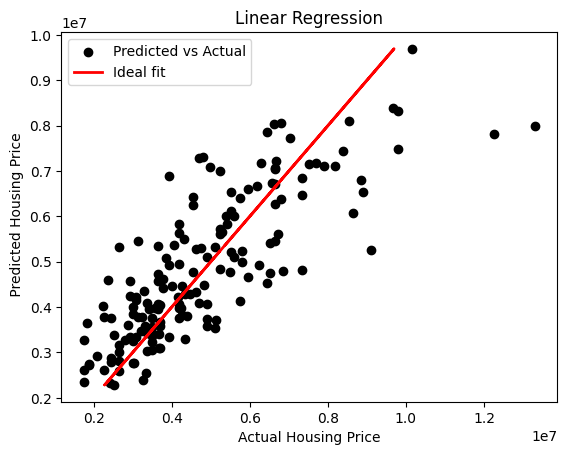

In [44]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.scatter(hprice_y_test, hprice_y_pred, color='black', label='Predicted vs Actual')
plt.plot(hprice_y_pred, hprice_y_pred, color='red', linewidth=2, label='Ideal fit')

plt.xlabel("Actual Housing Price")
plt.ylabel(" Predicted Housing Price")
plt.legend()
plt.title("Linear Regression")

plt.show()


### Modelo de Regresión Ridge

La regresión Ridge `regulariza` la regresión lineal imponiendo una `penalización` al tamaño de los `coeficientes`. La regularización consiste en restringir explícitamente un modelo para evitar el `sobre ajuste` del éste. 

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

datos_rr = df_price.copy()

<Axes: >

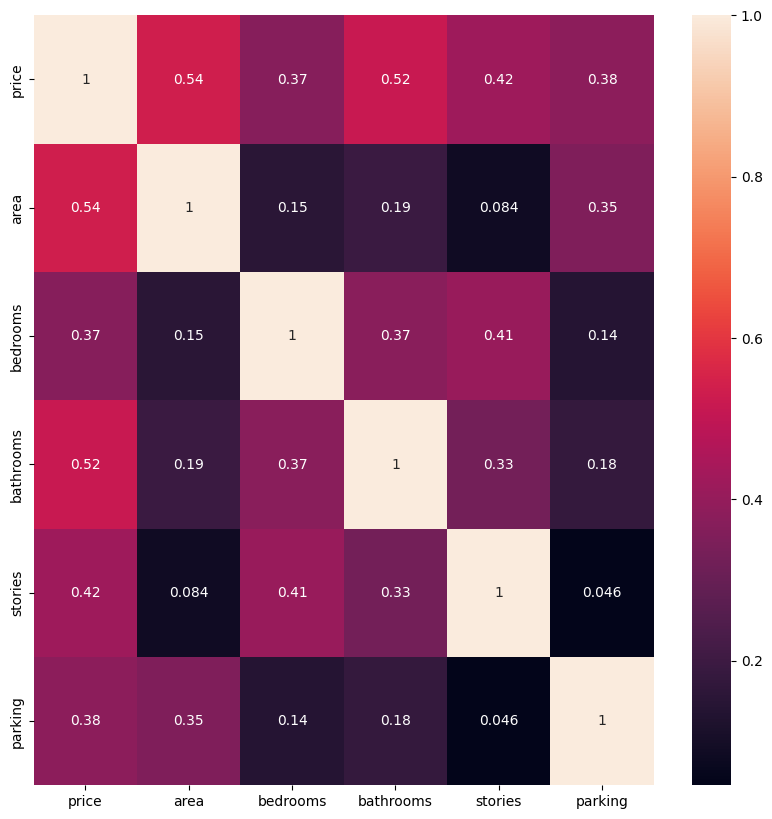

In [65]:
datos_rr = df_price.copy()
datos_rr = datos_rr.drop(columns=['guestroom', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus'])# Eliminar la columnas categóricas
#Mapa de calor
plt.figure(figsize = (10, 10))
sns.heatmap(datos_rr.corr(), annot = True)

A continuación se ajusta el modelo de Regresión de Ridge a los datos de entrenamiento y se estima el score de los datos de test y train. 

In [64]:
# Create #Ridge Regression Model
model_ridgeReg = Ridge(alpha=10)

model_ridgeReg.fit(hprice_X_train, hprice_y_train) # Ajustar el modelo a los datos de entrenamiento

coef_ridgeReg = model_ridgeReg.coef_.squeeze().tolist() #Se extraen los coeficientes del modelo en formato lista
print(coef_ridgeReg)

#train and test scorefor ridge regression
train_score_ridge = model_ridgeReg.score(hprice_X_train, hprice_y_train)
test_score_ridge = model_ridgeReg.score(hprice_X_test, hprice_y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

[262.7603688583124, 111067.24285278782, 981586.398641078, 422878.43530156, 302747.442723878, -184596.73494583054, 184596.73494582972, -134485.6758437872, 134485.6758437851, -238085.23745289803, 238085.23745289893, -241635.67274199467, 241635.67274199758, -324920.9939026689, 324920.99390266923, -236643.24863360316, 236643.24863360435, 166096.10516460065, 49189.15091825536, -215285.2560828642]

Ridge Model............................................

The train score for ridge model is 0.6916203821240977
The test score for ridge model is 0.6446792029653707


Procedemos a estimar el score de los datos de test y train para el modelo de regresión Lineal (`mod1`).

In [68]:
mod1 = modelrl.fit(hprice_X_train, hprice_y_train) # Ajustar el modelo a los datos de entrenamiento

train_score_lr = mod1.score(hprice_X_train, hprice_y_train) # R^2
test_score_lr = mod1.score(hprice_X_test, hprice_y_train)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))





ValueError: Found input variables with inconsistent numbers of samples: [381, 164]

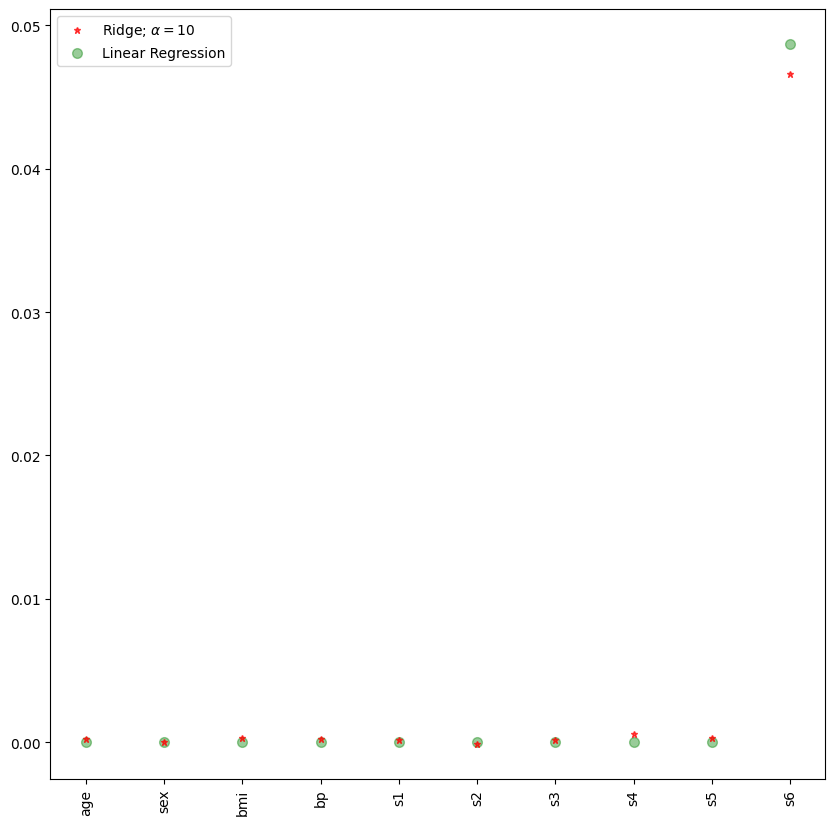

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.01724854760268868


In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.9999957822379921
0.9999957094877234


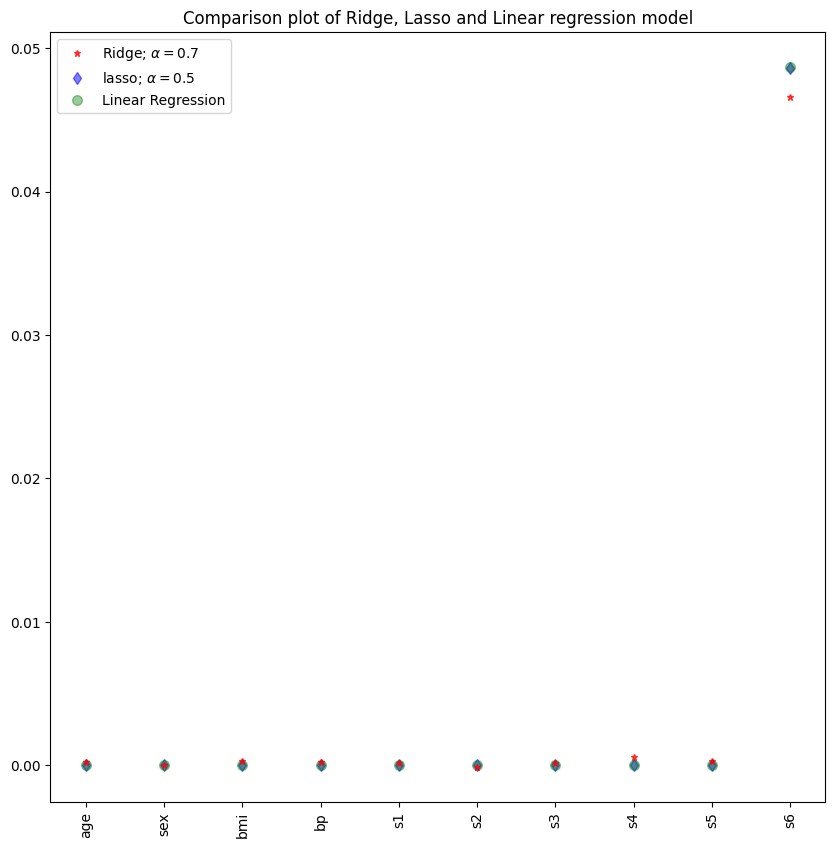

In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.7$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = 0.5$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()